In [ ]:
#!pip install scikit-plot

In [3]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import pickle
from joblib import dump

In [4]:
url = 'https://raw.githubusercontent.com/leilaff89/house_sales_prediction/main/datasets/house_prices_ml_features.csv'

In [5]:
df = pd.read_csv(url)

In [ ]:
#df.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD
0,13.151488,12.807653,3,2,2.0,4.934474,2013,26900,8.496990,-32.193470,115.859554,1.709161,129.0,2019
1,12.571507,12.567237,3,1,1.0,4.454347,1979,22600,7.549609,-32.120578,115.993579,0.500277,113.0,2015
2,13.300859,13.437174,3,2,8.0,4.836282,1999,5900,6.230481,-31.917880,115.907050,-0.065880,29.0,2019
3,12.831836,12.814479,3,2,2.0,5.062595,2003,36300,7.649693,-31.654280,115.702200,-0.384423,39.0,2018
4,13.167607,13.190022,4,2,4.0,5.509388,2002,23100,8.268732,-32.159590,115.849480,0.797797,129.0,2019


In [6]:
X = df.drop(columns=['PRICE'],axis =1).values
y = df['PRICE'].values

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rfc = RandomForestRegressor(random_state=42) 

In [ ]:
param_grid = { 
    'n_estimators': [950],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [30],
    'bootstrap': [False]
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [False], 'max_depth': [30],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [950]})

In [ ]:
CV_rfc.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 950}

In [9]:
rfc = RandomForestRegressor(n_estimators=950, max_features='sqrt', max_depth=30, bootstrap=False, random_state=42) 

In [10]:
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=950, random_state=42)

In [11]:
prediction = rfc.predict(X_test)

In [12]:
r2_score(y_test, prediction)

0.8591645474303055

In [13]:
mean_squared_error(y_test, prediction)

0.03661734670780675

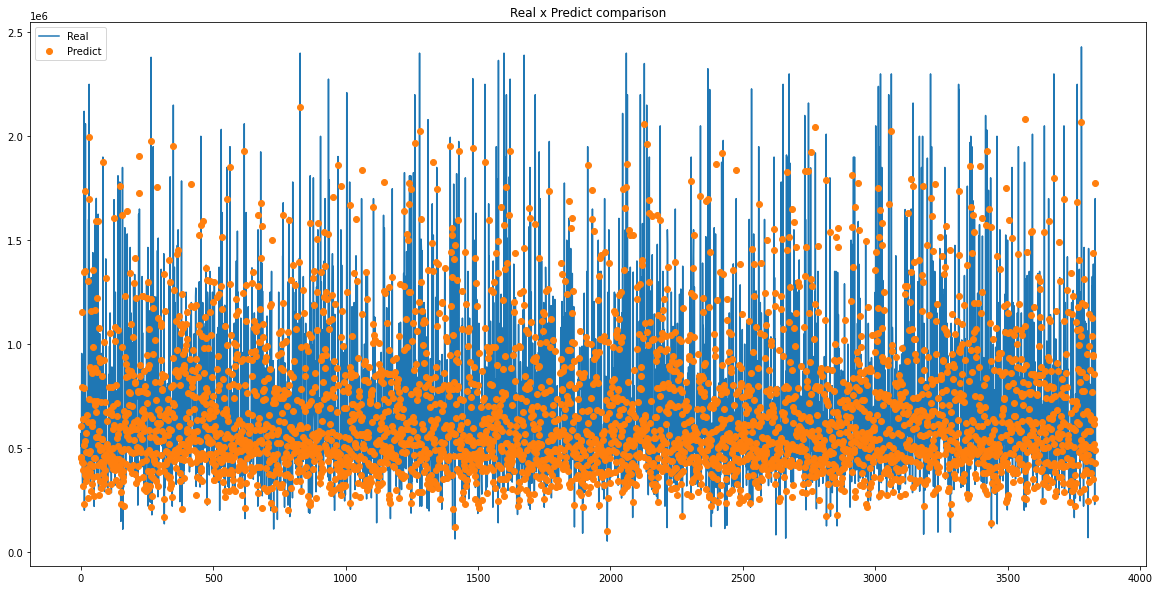

In [14]:
plt.figure(figsize=(20,10))
plt.plot(np.exp(y_test))
plt.plot(np.exp(prediction), 'o')

plt.legend(['Real', 'Predict'], loc='upper left')
plt.title('Real x Predict comparison')
plt.show()

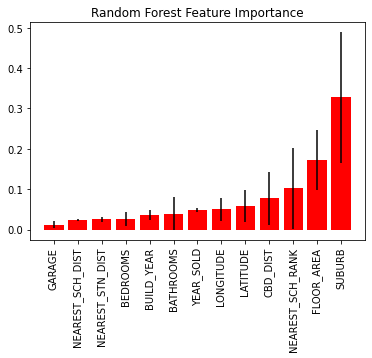

In [15]:
skplt.estimators.plot_feature_importances(rfc, feature_names=df.drop(columns=['PRICE'],axis =1).columns,
                                         title="Random Forest Feature Importance",
                                         x_tick_rotation=90, order="ascending");

In [ ]:
pickle.dump(rfc, open('rfc.sav', 'wb'))
dump(rfc, 'rfc.pkl')

['rfc.pkl']

## TESTES

In [ ]:
#X[0:1]
teste1 = ([[ 1.31514882e+01,  3.00000000e+00,  2.00000000e+00,
             2.00000000e+00,  4.93447393e+00,  2.01300000e+03,
             2.69000000e+04,  8.49699048e+00, -3.21934703e+01,
             1.15859554e+02,  1.70916095e+00,  1.29000000e+02,
             2.01900000e+03]])

#X_test[0:1] - scaled
teste2 = ([[-0.33399557, -0.89997173, -1.46541764,  0.81950955, -1.23379563,
             0.23218144, -0.46774828, -0.68202706,  0.24561533,  1.13650472,
             0.35657949, -0.49341297,  0.02841612]])

teste3 = ([[ 1.70000000e+05,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
            3.95124372e+00,  1.87000000e+03,  1.30000000e+03,  3.82864140e+00,
            -3.24555500e+01,  1.15675834e+02, -2.65926004e+00,  1.00000000e+00,
            1.98800000e+03]])

In [ ]:
teste1 = scaler.transform(teste1)
teste3 = scaler.transform(teste3)

In [ ]:
pred1 = rfc.predict(teste1)
pred2 = rfc.predict(teste2)
pred3 = rfc.predict(teste3)

pred1 = np.exp(pred1)
pred2 = np.exp(pred2)
pred3 = np.exp(pred3)

In [ ]:
print(pred1, pred2, pred3)

[414969.43151212] [380228.76424123] [700195.22861637]
